# COMP4030 - Data Science and Machine Learning - Lab 3
# Visualisation with Matplotlib and Seaborn

*Authors*: Johann Benerradi, Jeremie Clos

**Points from last lab you absolutely need to be familiar with**:

- read Excel file: `pd.read_excel()`


- rename columns: `df.rename()`


- unique values from a column: `df.unique()`
- duplicated rows: `df.duplicated()`
- drop duplicated rows: `df.drop_duplicates()`


- quantile / percentile: `df.quantile()`


- rows with *NaN*: `df.isna()`
- drop rows with *NaN*: `df.dropna()`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Getting started with visualisation

Let's first get started with data visualisation on simple example datasets.

### 1.1 Line plots

> Line plots are good to visualise the relationship between two continuous variables (typically time series).

First let's load a dataset gathering life expectancy in different countries throughout the years:

In [2]:
df = sns.load_dataset('healthexp')
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


We then define a subsets of this dataset for convenience later on:

#### Matplotlib

Matplotlib is a Python plotting interface. It contains the most basic functions in order to create simple line plots. Let's create a basic line plot with data from the USA:

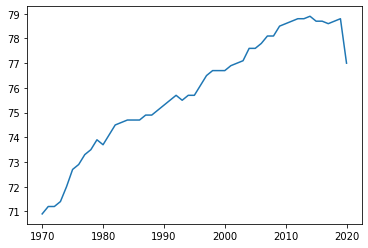

In [3]:
df_us = df[df['Country'] == 'USA']
plt.plot(df_us['Year'], df_us['Life_Expectancy'])
plt.show()

We can also obviously create a lineplot with more than one line:

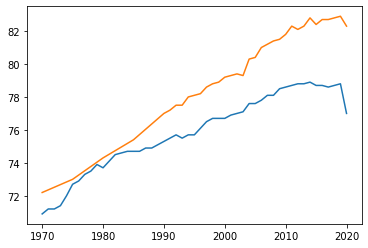

In [4]:
df_fr = df[df['Country'] == 'France']
plt.plot(df_us['Year'], df_us['Life_Expectancy'])
plt.plot(df_fr['Year'], df_fr['Life_Expectancy'])
plt.show()

This previous plot looks a bit empty, let's add axis titles and a legend:

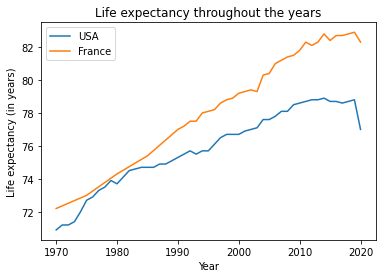

In [5]:
plt.plot(df_us['Year'], df_us['Life_Expectancy'], label='USA')
plt.plot(df_fr['Year'], df_fr['Life_Expectancy'], label='France')
plt.legend()
plt.title('Life expectancy throughout the years')
plt.xlabel('Year')
plt.ylabel('Life expectancy (in years)')
plt.show()

We can also create subplots:

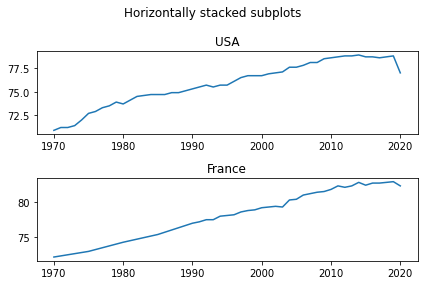

In [6]:
fig, axs = plt.subplots(2)
fig.suptitle('Horizontally stacked subplots')
axs[0].plot(df_us['Year'], df_us['Life_Expectancy'])
axs[0].set_title('USA')
axs[1].plot(df_fr['Year'], df_fr['Life_Expectancy'])
axs[1].set_title('France')
plt.tight_layout()  # to avoid overlapping of subplots when the figure is small
plt.show()

You can notice that when creating multiple plots the axis is automatically scaled to each subplot. Setting axis limits can then be very important in order to compare easily two subplots and avoid misleading the reader:

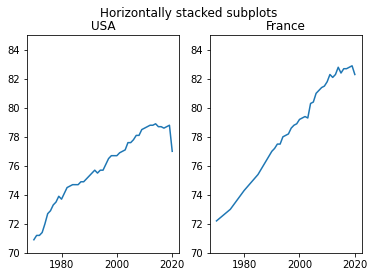

In [7]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
axs[0].plot(df_us['Year'], df_us['Life_Expectancy'])
axs[0].set_title('USA')
axs[0].set_ylim(70, 85)
axs[1].plot(df_fr['Year'], df_fr['Life_Expectancy'])
axs[1].set_title('France')
axs[1].set_ylim(70, 85)
plt.show()

We can create as many subplots as we like:

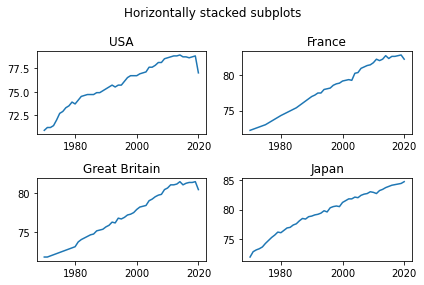

In [8]:
df_gb = df[df['Country'] == 'Great Britain']
df_ja = df[df['Country'] == 'Japan']
fig, axs = plt.subplots(2, 2)
fig.suptitle('Horizontally stacked subplots')
axs[0, 0].plot(df_us['Year'], df_us['Life_Expectancy'])
axs[0, 0].set_title('USA')
axs[0, 1].plot(df_fr['Year'], df_fr['Life_Expectancy'])
axs[0, 1].set_title('France')
axs[1, 0].plot(df_gb['Year'], df_gb['Life_Expectancy'])
axs[1, 0].set_title('Great Britain')
axs[1, 1].plot(df_ja['Year'], df_ja['Life_Expectancy'])
axs[1, 1].set_title('Japan')
plt.tight_layout()  # to avoid overlapping of subplots when the figure is small
plt.show()

#### Seaborn

Matplotlib can quickly become limited and hard to use when we want to do advanced visualisation. Instead we can use Seaborn which is high-level interface for visualisation actually based on Matplotlib, for example it enables us to create easily a plot with multiple lines from a pandas *DataFrame* thanks to the `hue` argument:

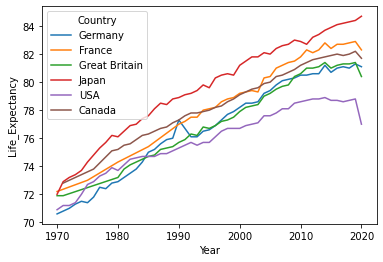

In [9]:
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.show()

We can also display bands representing standard deviation (this gives a good idea of how data is distributed around the mean):

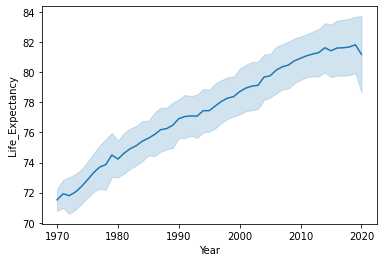

In [10]:
sns.lineplot(data=df, x='Year', y='Life_Expectancy', errorbar='sd')
plt.show()

**Task 1.1.1**: Have a look at the `lineplot()` function documentation and display with bands the confidence interval instead of the standard deviation.

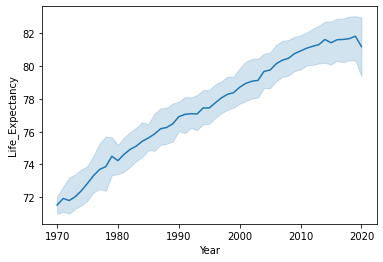

Whenever there are many *y* values for each *x*, we can represent bands around the mean. Here for example let's create continent subgroups, each with values from multiple countries:

In [12]:
europe = ['Germany', 'France', 'Great Britain']
other = ['Japan', 'USA', 'Canada']
df.loc[df['Country'].isin(europe), 'Continent'] = 'Europe'
df.loc[df['Country'].isin(other), 'Continent'] = 'Other'
df

,Year,Country,Spending_USD,Life_Expectancy,Continent
0,1970,Germany,252.311,70.6,Europe
1,1970,France,192.143,72.2,Europe
2,1970,Great Britain,123.993,71.9,Europe
3,1970,Japan,150.437,72.0,Other
4,1970,USA,326.961,70.9,Other
...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,Europe
270,2020,France,5468.418,82.3,Europe
271,2020,Great Britain,5018.700,80.4,Europe
272,2020,Japan,4665.641,84.7,Other


We can then display standard deviation bands for each subgroup:

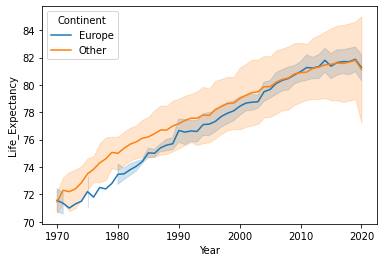

In [13]:
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Continent', errorbar='sd')
plt.show()

**Task 1.1.2**: Have a look at the `ax` argument of the `lineplot()` function and instead of having both lines on the same graph, create subplots to display them side by side, with standard deviation.

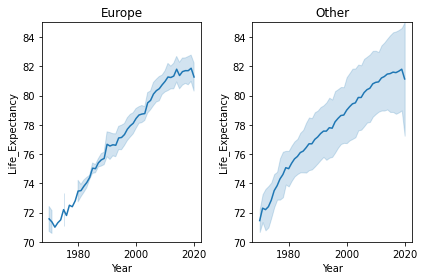

### 1.2 Scatter plots

> Scatter plots are good to visualise independent data points.

Let's load now the penguin dataset that we've been using previously but this time the original version (alternatively feel free to use the cleaned up version from last lab if you have saved it in a file):

In [15]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Again, here Matplotlib enables us to do simple plotting:

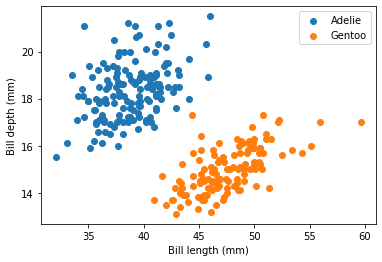

In [16]:
df_ad = df[df['species'] == 'Adelie']
df_ge = df[df['species'] == 'Gentoo']
plt.scatter(df_ad['bill_length_mm'], df_ad['bill_depth_mm'], label='Adelie')
plt.scatter(df_ge['bill_length_mm'], df_ge['bill_depth_mm'], label='Gentoo')
plt.legend()
plt.xlabel('Bill length (mm)')
plt.ylabel('Bill depth (mm)')
plt.show()

But again, Seaborn is also more convenient and enables to do more advanced plotting:

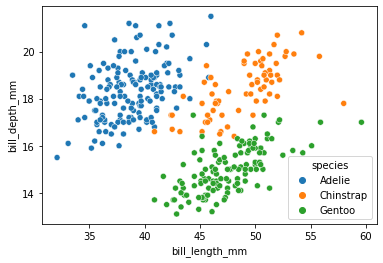

In [17]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

It may be useful to change the style of point, for example for accessibility reasons. Moreover, Seaborn has also a colour blind palette:

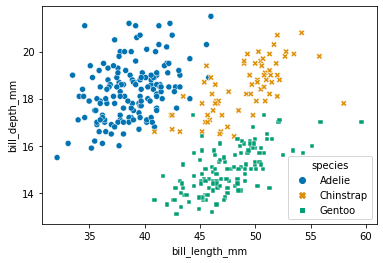

In [18]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', palette='colorblind')
plt.show()

We can also display more information with a scatter plot with the size of the points:

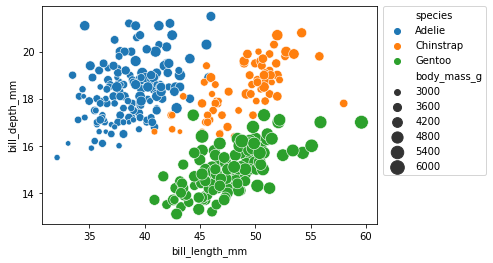

In [19]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', size='body_mass_g', sizes=(20, 200))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  # place legend outside top right corner of plot
plt.show()

A useful thing with seaborn is that we can create a scatter plot also displaying the linear regression (this will be useful when we will see in later labs correlation:

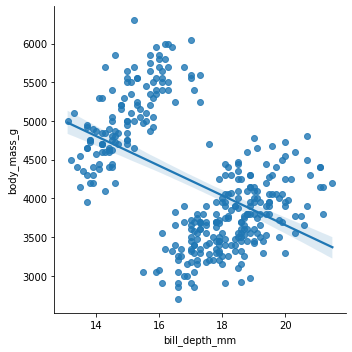

In [20]:
sns.lmplot(data=df, x='bill_depth_mm', y='body_mass_g')
plt.show()

We can also do that with subgroups using `hue` (we can also edit axis titles and legends of figures created with Seaborn):

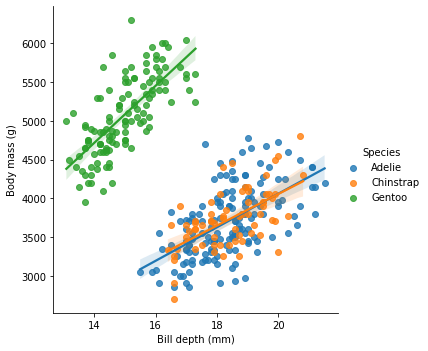

In [21]:
figure = sns.lmplot(data=df, x='bill_depth_mm', y='body_mass_g', hue='species')
plt.xlabel('Bill depth (mm)')
plt.ylabel('Body mass (g)')
figure._legend.set_title('Species')
plt.show()

> **Note**: The trend with all groups together appears to be opposite of the one of each subgroup, this is an example of the [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox).

**Task 1.2.1**: Visualise the relationship between bill length and flipper length using a scatter plot with linear regression, depending on the island on which penguins live.

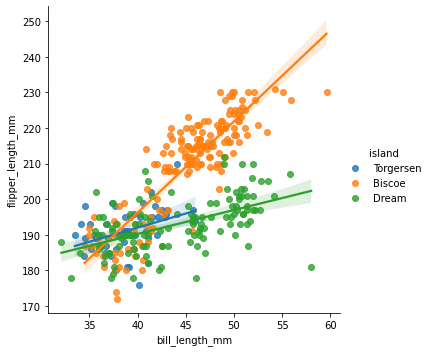

### 1.3 Bar plots

> Bar plots are good to visualise the relationship between a continuous and a discrete variable.

Let's first create a basic bar plot with Matplotlib:

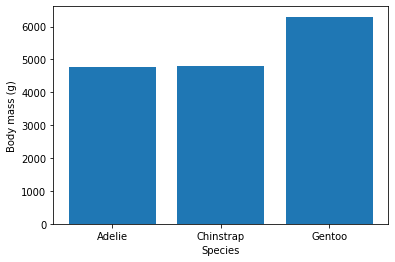

In [23]:
plt.bar(df['species'], df['body_mass_g'])
plt.xlabel('Species')
plt.ylabel('Body mass (g)')
plt.show()

Again, Seaborn makes our life much easier and it also displays error bars representing 95% confidence interval by default:

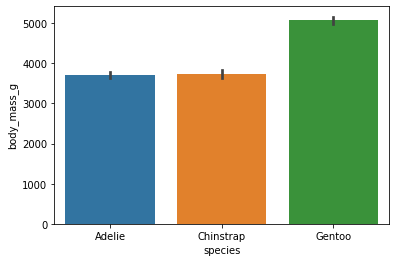

In [24]:
sns.barplot(data=df, x='species', y='body_mass_g')
plt.show()

We can also do that with subgroups using `hue`:

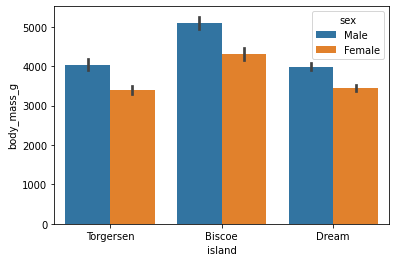

In [25]:
sns.barplot(data=df, x='island', y='body_mass_g', hue='sex')
plt.show()

**Task 1.3.1**: Create the same histogram as above, but this time, have a look at the documentation of the `barplot()` function to display the standard deviation instead default confidence interval.

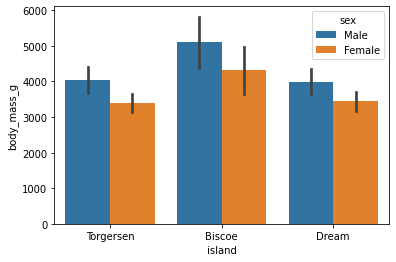

### 1.4 Histograms

> Histograms are good to visualise the distribution of data in different classes (typically the amount of data in each class).

We can create a basic histogram with Matplotlib:

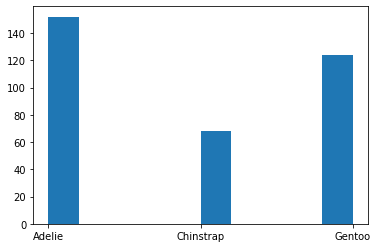

In [27]:
plt.hist(df['species'])
plt.show()

Or more advanced ones using subgroups with Seaborn:

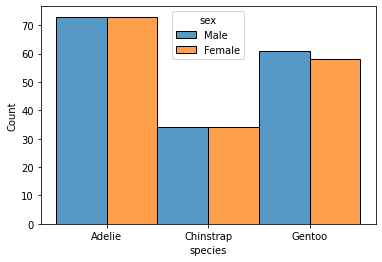

In [28]:
sns.histplot(data=df, x='species', hue='sex', multiple='dodge')
plt.show()

**Task 1.4.1**: Create the same histogram as above, but this time, have a look at the documentation of the `histplot()` function to display the percentage instead of the count on the *y* axis.

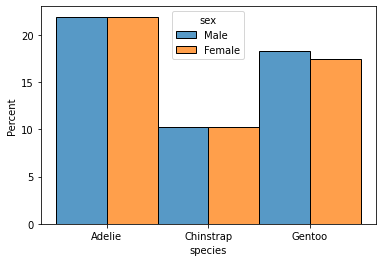

We can also visualise the distribution of data in a continuous variable, which will automatically be discretised into classes:

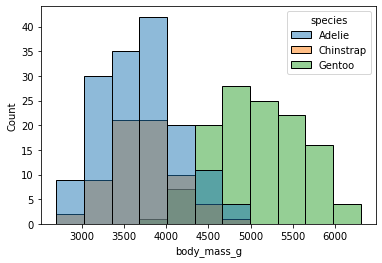

In [30]:
sns.histplot(data=df, x='body_mass_g', hue='species')
plt.show()

The number of classes created can be adjusted with the `bins` argument:

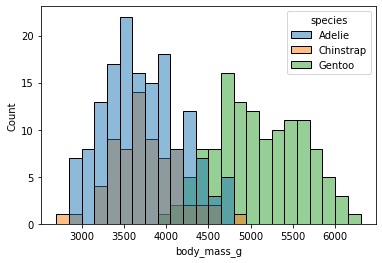

In [31]:
sns.histplot(data=df, x='body_mass_g', hue='species', bins=24)
plt.show()

When we have numerical data, insteade of discretising it, we can also use disribution plots, they enable to have a smoothened visualisation of the distribution (they use for that purpose kernel density estimation of the underlying distribution, so this visualisation can look misleadingly distorted with distributions which are bounded or not smooth):

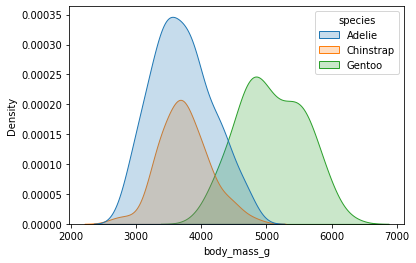

In [32]:
sns.kdeplot(data=df, x='body_mass_g', hue='species', fill=True)
plt.show()

While earlier we were representing histograms with two dimensions (a variable and the count), here we can also visualise a third dimension on the same graph using colour intensity, the three dimensions being 2 variables along the *x* and *y* axis and the count with colour intensity:

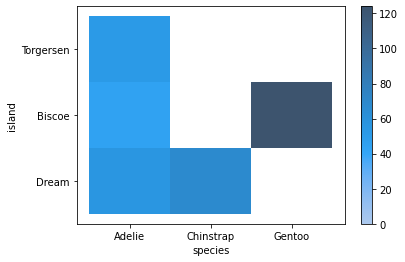

In [33]:
sns.histplot(data=df, x='species', y='island', cbar=True)
plt.show()

### 1.5 Box plots

> Boxplots are good to visualise the distribution of data on a continuous variable (tipically Q1, Q3 and the median).

Once more, using Matplotlib first, we can plot a simple box plot:

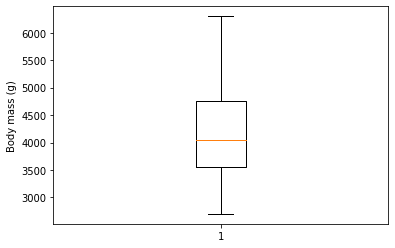

In [34]:
plt.boxplot(df['body_mass_g'].dropna())
plt.ylabel('Body mass (g)')
plt.show()

And now with Seaborn for more advanced visualisation:

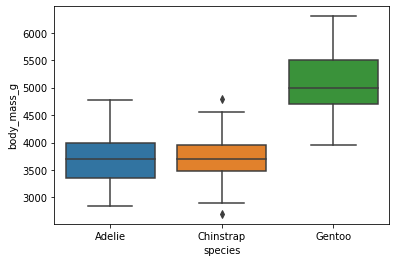

In [35]:
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.show()

We can visualise subgroups with `hue`:

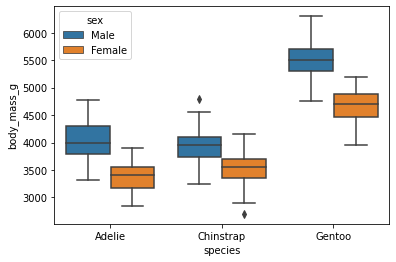

In [36]:
sns.boxplot(data=df, x='species', y='body_mass_g', hue='sex')
plt.show()

**Task 1.5.1**: Create a box plot visualisation to show the distribution of flipper length for each sex and each species.

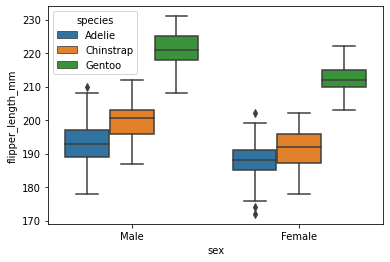

We can also use violin plots (similarly to what we have seen before with distribution plots, they use kernel density estimation of the underlying distribution, so this visualisation can look misleadingly smooth with relatively small samples):

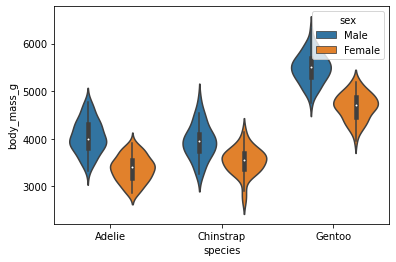

In [38]:
sns.violinplot(data=df, x='species', y='body_mass_g', hue='sex')
plt.show()

### 1.6 Saving figures

Here we have seen how to plot figures in the Jupyter notebook, however it may be handy to plot them in a separate window for more interactivity or for saving the figure easily. The following command, once run, enables to change the Matplotlib backend in order to plot all the new figures created in a separate window (in this case using the QT backend):

In [39]:
%matplotlib qt

**Task 1.6.1**: Plot one of the figures we have done before in a separate window, and save it using the interface.

We can revert back to plotting inline using the following command:

In [41]:
%matplotlib inline

Alternatively figures can be saved using Python code:

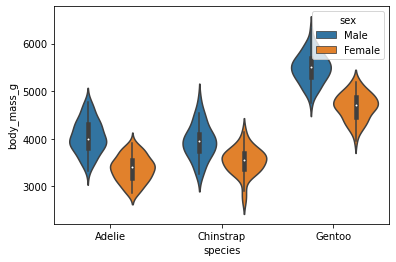

In [42]:
sns.violinplot(data=df, x='species', y='body_mass_g', hue='sex')
plt.savefig('violin_plot.png')

---

## 2. Final tasks

Let's load the cleaned up questionnaire dataset from last lab, it can be found on Moodle (alternatively, just save the dataset from last lab after cleanup and load it here):

In [43]:
df_ao = pd.read_csv('2023_analyse_ourselves.csv')
df_ao

,ID,Start time,Completion time,I love,Age Band,Loving Marmite,DMA motivation,Optimistic about future,Favourite movie,Feeling today,Way to relax,Hours of sleep,Number of sweets,Completion duration,Standardised hours of sleep
0,1,2023-01-31 13:05:06,2023-01-31 13:05:52,Dogs,18 to 24,Yes,Increase knowledge of subject area,Strongly Agree,The Shawshank Redemption,Excited,Gym workout,8.0,7.0,46.0,0.714737
1,2,2023-01-31 16:12:13,2023-01-31 16:14:24,Cats,18 to 24,No,Increase knowledge of subject area,Strongly Agree,The Shawshank Redemption,Tired,Gaming,8.0,35.0,131.0,0.714737
2,3,2023-01-31 16:29:12,2023-01-31 16:30:16,Both,18 to 24,Don't know what it is,Just curious,Agree,Pulp Fiction,Tired,Bath and Bed,NaN,1.0,64.0,NaN
3,4,2023-01-31 17:18:53,2023-01-31 17:20:40,Both,18 to 24,Don't know what it is,Increase knowledge of subject area,Agree,None of the above,Sad,Bath and Bed,7.0,3.0,107.0,-0.133653
4,5,2023-01-31 17:39:18,2023-01-31 17:40:34,Both,18 to 24,No,Increase knowledge of subject area,Agree,None of the above,Excited,Gaming,7.5,25.0,76.0,0.290542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,202,2023-02-03 15:55:08,2023-02-03 15:56:30,Cats,18 to 24,Don't know what it is,Relevant to my research,Neutral,Enter the Dragon,Tired,Gaming,7.0,10.0,82.0,-0.133653
188,203,2023-02-03 18:22:25,2023-02-03 18:23:26,Dogs,18 to 24,Never tried it,Just curious,Strongly Agree,Star Wars (1977),Excited,Reading a book,7.0,50.0,61.0,-0.133653
189,204,2023-02-05 19:06:06,2023-02-05 19:08:23,Cats,25 to 30,Don't know what it is,Increase knowledge of subject area,Strongly Agree,The Shawshank Redemption,Tired,Bath and Bed,7.0,6.0,137.0,-0.133653
190,205,2023-02-06 11:44:38,2023-02-06 11:45:41,Both,18 to 24,Don't know what it is,Improve job opportunities,Strongly Agree,None of the above,Excited,Gym workout,6.0,NaN,63.0,-0.982043


**Final task 1**: For the column describing optimism about the future, convert all the nuances of "agree" into a single value, and all the nuances of "disagree" into another single value such that the only possible values are *Agree*, *Disagree* and *Neutral*.

**Final task 2**: Use the most appropriate plot to visualise the distribution of data in the different classes of optimism about the future.

**Final task 3**: Use the most appropriate plot to visualise the hours of sleep depending on what animal people love.

**Final task 4**: Use the most appropriate plot to visualise the relationship between the completion time and the number of hours of sleep. Does it look like there is a correlation?

**Final task 5**: Use the most appropriate plot to visualise the distribution of data depending people's feeling the day of answering the questionnaire and their optimism about the future.

**Final task 6**: Use three different appropriate plot types to visualise the distribution of hours of sleep depending on what animal people love.

---

## 3. Open tasks

For the open tasks, we will use a real dataset that is actually referenced on the [official UK government website for open data](https://www.data.gov.uk/) and can be found at [this address](https://www.hesa.ac.uk/data-and-analysis/finances/income). You can find on Moodle the CSV file of the first table of that dataset. It is data about income and expenditure of UK higher education providers.

In [50]:
df_he = pd.read_csv('higher_education.csv', skiprows=16)  # https://www.hesa.ac.uk/data-and-analysis/finances/income
df_he  # data in thousands of GBP

,UKPRN,HE Provider,Financial Year End,Tuition fees and education contracts,Funding body grants,Research grants and contracts,Other income,Investment income,Donations and endowments,Total income,Staff costs,Restructuring costs,Other operating expenses,Depreciation and amortisation,Interest and other finance costs,Total expenditure
0,10008071.0,AA School of Architecture,2021-07-31,"19,072",0,0,"1,332",2,870,"21,276","9,574",0,"6,846",393,57,"16,870"
1,10007783.0,The University of Aberdeen,2021-07-31,"74,423","87,577","45,927","25,764","2,012",236,"235,939","146,956",0,"59,306","16,855","5,840","228,957"
2,10007849.0,Abertay University,2021-07-31,"10,414","21,581","2,862","2,003",313,4,"37,177","27,715",0,"7,300","2,671",416,"38,102"
3,10007856.0,Aberystwyth University,2021-07-31,"53,989","22,054","20,217","21,707",233,642,"118,842","66,187",184,"38,544","11,946","4,003","120,864"
4,10067853.0,ACM Guildford Limited,2020-08-31,"10,614","1,381",0,619,0,0,"12,614","5,953",0,"3,559",101,18,"9,631"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,10007139.0,University of Worcester,2021-07-31,"77,197","7,363",620,"8,701",6,16,"93,903","55,936",0,"29,940","4,155","4,124","94,155"
283,10007657.0,Writtle University College,2021-07-31,"7,115","5,754",0,"2,316",67,25,"15,277","11,903",90,"4,831","1,542",321,"18,687"
284,10007713.0,York St John University,2021-07-31,"59,969","4,339",176,"6,954",32,10,"71,480","42,526",0,"21,792","3,980","1,090","69,388"
285,10007167.0,The University of York,2021-07-31,"229,082","47,471","69,810","63,351",908,"3,230","413,852","246,124",0,"133,947","32,334","10,276","422,681"


In [51]:
df_he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UKPRN                                 286 non-null    float64
 1   HE Provider                           287 non-null    object 
 2   Financial Year End                    286 non-null    object 
 3   Tuition fees and education contracts  287 non-null    object 
 4   Funding body grants                   287 non-null    object 
 5   Research grants and contracts         287 non-null    object 
 6   Other income                          287 non-null    object 
 7   Investment income                     287 non-null    object 
 8   Donations and endowments              287 non-null    object 
 9   Total income                          287 non-null    object 
 10  Staff costs                           287 non-null    object 
 11  Restructuring costs

**Open task 1**: The UKPRN column is interpreted as a floating-point number column, convert it into an integer column.

**Open task 2:**: Most of the numbers have contain a comma for thousands, remove all the commas and make sure the columns are interpreted as floating-point numbers.

**Open task 3**: All the numbers are in thousands of GBP, multiply them all by 1000 to have them in GBP.

**Open task 4**: One row represents totals, ensure these are correct and then remove that row from the *DataFrame* for further analysis.

**Open task 5**: Create a new column with information about whether each university is member of the [Russell Group](https://en.wikipedia.org/wiki/Russell_Group) or not.

**Open task 6**: Use the most appropriate plot to visualise the difference of income of Russell Group universities (RGUs) as opposed to non-Russell Group universities (non-RGUs).

**Open task 7**: Use the most appropriate plot to visualise the relationship between staff costs and research grants and contracts incomes for the RGUs as opposed to non-RGUs.

**Open task 8**: Use the most appropriate plot to visualise the distribution of tuation fees for RGUs as opposed to non-RGUs.